<a href="https://colab.research.google.com/github/ArjunRameshV/Neural_Networks/blob/master/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

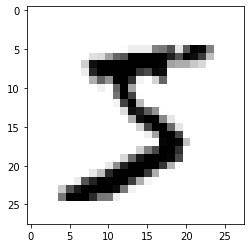

In [7]:
plt.imshow(single_image,cmap='gray_r')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
#one-hot coding
from keras.utils.np_utils import to_categorical

In [11]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [12]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
#processing the x data
## normalise the data
single_image.max()

255

In [14]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

In [16]:
scaled_img = x_train[0]
scaled_img.max()

1.0

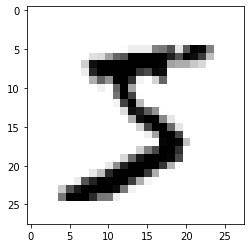

In [17]:
plt.imshow(scaled_img,cmap='gray_r')

In [18]:
#reshape the data
x_train.shape

(60000, 28, 28)

In [20]:
#reshape the images to add a color channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_test.shape,x_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [21]:
#making the model
from keras.models import Sequential

In [22]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
model = Sequential() 

#convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#convert this into some that a single dense layer can understand
#a flattening layer
model.add(Flatten())

#a dense layer
model.add(Dense(128,activation='relu'))

#the output layer
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 33s 556us/step - loss: 0.1376 - accuracy: 0.9581
Epoch 2/2
60000/60000 [==============================] - 33s 552us/step - loss: 0.0495 - accuracy: 0.9852


In [29]:
model.metrics_names

['loss', 'accuracy']

In [30]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 162us/step


[0.04878578955568373, 0.9839000105857849]

In [31]:
from sklearn.metrics import classification_report

In [32]:
predictions = model.predict_classes(x_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
img = x_test[0]

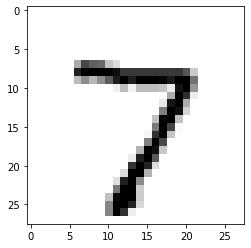

In [38]:
plt.imshow(img.reshape(28,28),cmap='gray_r')

In [40]:
predictions[0]

7

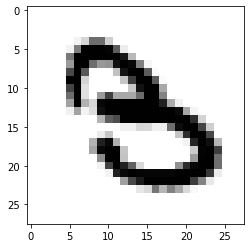

In [41]:
plt.imshow(x_test[18].reshape(28,28),cmap='gray_r')

In [42]:
predictions[18]

3